# Q. 푸드 트럭에 주문이 없는 경우 어느 곳에서 대기해야 수익률을 올릴 수 있을까?

### 1. 푸드 트럭란?
특정 디바이스를 통하여 주문이 시작되면 배달지 이동중에 조리를 동시에 할 수 있는 트럭

### 2. 문제 정의
기존에 주문이 활발한 상황을 제외하고 주문이 없어 조리하지도 않고 이동하지도 않는 상황에서 

어떤 위치에 대기하고 있어야 그나마 수익성을 기대해 볼 수 있을 것인가에 대한 질문을 던져봅니다.

### 3. 데이터
데이터를 준비함에 있어서 위치정보와 고객정보, 주문정보를 가지고 있는 데이터가 가장 중요하였고,

Kaggle을 통하여 Online Food Delivery라는 데이터를 통해 위 해당 데이터를 입수 할 수 있었습니다.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('onlinedeliverydata.csv')
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [3]:
df.shape

(388, 55)

# 데이터 정리

### 1. 필요 Columns

* Age : 소비자 연령
* Gender : 소비자 성별
* Marital Status : 소비자의 혼인 여부
* Occupation : 소비자 직업
* Monthly Income : 소비자의 소득구간
* Educational Qualifications : 소비자 학업
* Family size : 가족 규모
* latitude : 위도
* longitude : 경도
* Medium (P1) : 주문 매체(선호 1)
* Meal(P1) : 식사 주문 종류(선호 1)
* Output : 다시 구매할 의사



In [4]:
need_feature = ['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Family size', 'latitude', 'longitude', 'Medium (P1)', 'Meal(P1)', 'Output' ]

In [5]:
df = df[need_feature]
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Medium (P1),Meal(P1),Output
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,Food delivery apps,Breakfast,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,Food delivery apps,Snacks,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,Food delivery apps,Lunch,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,Food delivery apps,Snacks,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,Walk-in,Lunch,Yes


In [6]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 775 kB/s 


In [7]:
from sklearn.cluster import KMeans
from category_encoders import OrdinalEncoder

ordinal = OrdinalEncoder(cols = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Medium (P1)', 'Meal(P1)', 'Output'])
ordinal_df = ordinal.fit_transform(df)

sse = {}

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(ordinal_df[['Monthly Income', 'Output']])
  sse[k] = kmeans.inertia_

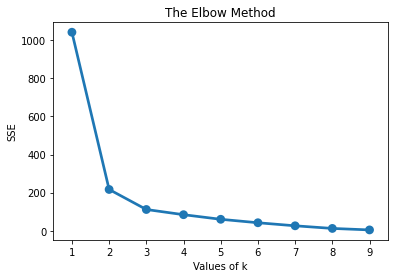

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [9]:
# 최종 모델 학습
kmeans = KMeans(n_clusters=2, max_iter=50, random_state=42)
kmeans.fit(ordinal_df[['Monthly Income', 'Output']])

# 해당 과정을 통해 
cluster_labels = kmeans.labels_

df = df.assign(Cluster = cluster_labels)

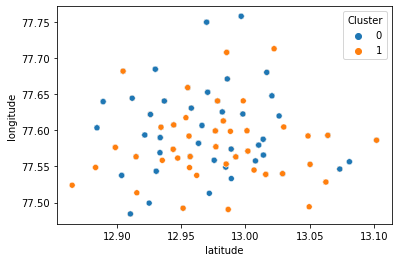

In [10]:
# GPS위치를 기반으로 클러스터 분석 
sns.scatterplot(x=df['latitude'], y=df['longitude'], hue=df['Cluster']);

In [11]:
df[df['Output'] == 'Yes'].groupby(['Cluster'])['Monthly Income'].value_counts()

Cluster  Monthly Income 
0        More than 50000     44
         25001 to 50000      42
         10001 to 25000      32
1        No Income          164
         Below Rs.10000      19
Name: Monthly Income, dtype: int64

In [12]:
df = df.astype({'Cluster':'category'})

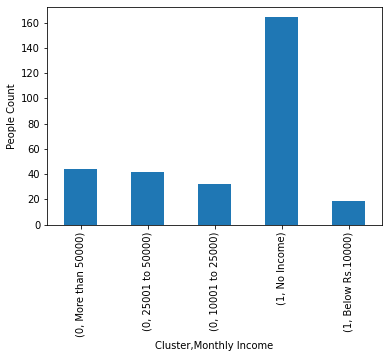

In [13]:
# 해당 그래프를 통해 재구매 의사가 있는 클러스터 0집단이 고소득구간임을 파악할 수 있다.
# 고로 0 클러스터는 상대적으로 주문을 할 확률이 높은 집단이라고 할 수 있다.
ax = df[df['Output'] == 'Yes'].groupby(['Cluster'])['Monthly Income'].value_counts().plot(kind='bar')
ax.set_ylabel('People Count');

In [14]:
target = 'Cluster'

In [15]:
# 데이터 누수 방지를 위한 Columns 삭제
df = df.drop(columns=['Monthly Income', 'Output'])

In [16]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(df, train_size=0.80, test_size=0.20, 
                              stratify=df[target], random_state=42)

In [17]:
train, test = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=42)

In [18]:
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test.drop(columns=target)

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [20]:
pipe = make_pipeline(
    OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=5, random_state=2)
)

pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

검증 정확도:  0.9230769230769231


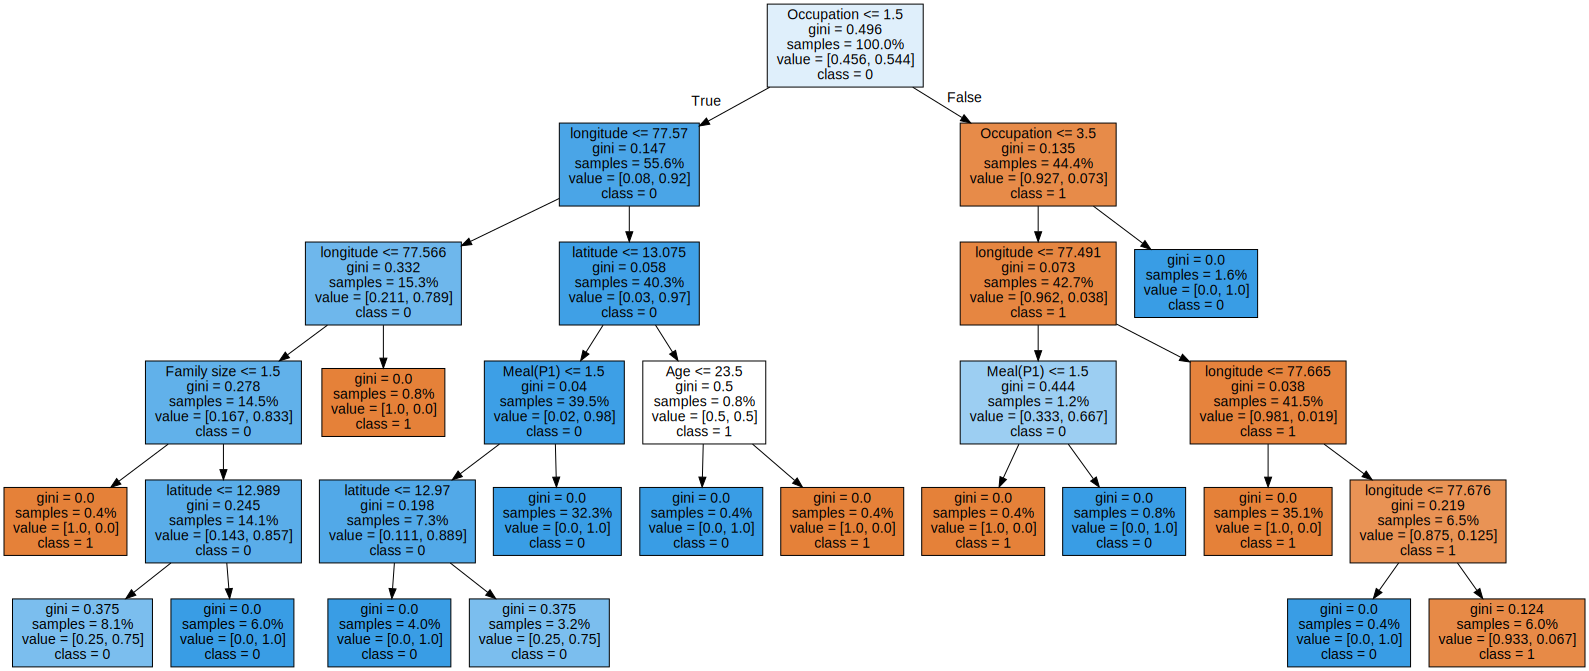

In [21]:
import graphviz
from sklearn.tree import export_graphviz

tree = pipe.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree,
    feature_names=X_train.columns, 
    class_names=y_train.unique().astype(str), 
    filled=True, 
    proportion=True
)

graphviz.Source(dot_data)

In [22]:
from sklearn.pipeline import Pipeline

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(random_state=2)
)

dists = {
    'simpleimputer__strategy': ['mean', 'median', 'most_frequent'],
    'randomforestclassifier__class_weight': ['balanced', 'balanced_subsample'],
    'randomforestclassifier__max_depth' : [5, 10, 15, 20, None],   
    'randomforestclassifier__n_estimators' : randint(1, 200),
    'randomforestclassifier__min_samples_leaf': randint(1, 20), 
    'randomforestclassifier__max_features' : uniform(0, 1),
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='f1',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [23]:
clf_pipe = clf.best_estimator_

print('검증 정확도', clf_pipe.score(X_val, y_val))
print(classification_report(y_val, clf_pipe.predict(X_val)))

검증 정확도 0.9487179487179487
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        35
           1       1.00      0.91      0.95        43

    accuracy                           0.95        78
   macro avg       0.95      0.95      0.95        78
weighted avg       0.95      0.95      0.95        78



In [24]:
from sklearn.metrics import roc_auc_score

y_pred_proba = clf_pipe.predict_proba(X_val)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))

AUC score:  0.9880398671096345


In [25]:
# 랜덤 포레스트에서 과적합이라고 생각했느데, 검증과 테스트 세트가 모두 좋은 결과를 내었다. 흠...
y_test = clf_pipe.predict(X_test)
print('검증 정확도', clf_pipe.score(X_test, y_test))

검증 정확도 1.0


In [26]:
# !pip install shap

In [27]:
# import shap

# model = clf.best_estimator_

# encoder = OrdinalEncoder()
# X_test_encoded = encoder.fit_transform(X_test)

# explainer = shap.TreeExplainer(model.named_steps['randomforestclassifier'])
# shap_values = explainer.shap_values(X_test_encoded.iloc[:60])
# shap.summary_plot(shap_values, X_test_encoded.iloc[:60])

In [28]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.1 MB/s 
     |████████████████████████████████| 133 kB 42.9 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=50c439e246be7dcff207c24179767f79715636bb77380720870531c46bc4ab0c
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompa

In [29]:
import eli5
from eli5.sklearn import PermutationImportance

In [30]:
pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('rf', clf_pipe.named_steps['randomforestclassifier']) 
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('ordinalencoder',
                                  OrdinalEncoder(cols=['Gender',
                                                       'Marital Status',
                                                       'Occupation',
                                                       'Educational '
                                                       'Qualifications',
                                                       'Medium (P1)',
                                                       'Meal(P1)'],
                                                 mapping=[{'col': 'Gender',
                                                           'data_type': dtype('O'),
                                                           'mapping': Female    1
Male      2
NaN      -2
dtype: int64},
                                                          {'col': 'Marital '
                                                                  'S

In [31]:
permuter = PermutationImportance(
    pipe.named_steps['rf'], # model
    scoring='accuracy', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=42
)

X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)

permuter.fit(X_val_transformed, y_val);

In [32]:
feature_names = X_val.columns.tolist()

eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.3949 ± 0.0784,Occupation
0.0256 ± 0.0162,Age
0.0205 ± 0.0126,latitude
0.0154 ± 0.0192,Educational Qualifications
0.0154 ± 0.0103,Marital Status
0.0128 ± 0.0000,Meal(P1)
0.0128 ± 0.0000,longitude
0.0128 ± 0.0229,Gender
0.0103 ± 0.0103,Family size
0 ± 0.0000,Medium (P1)


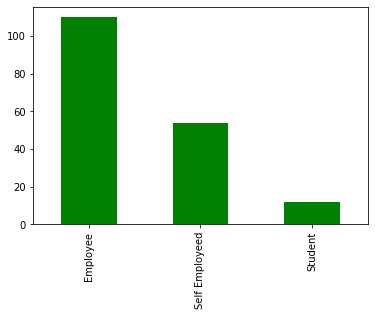

In [47]:
df[df['Cluster'] == 0]['Occupation'].value_counts().plot(kind='bar', color='green')

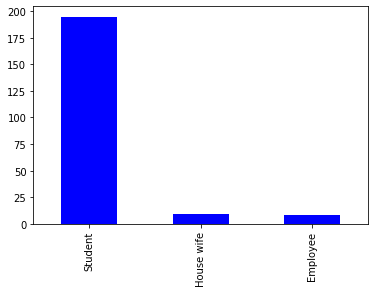

In [48]:
df[df['Cluster'] == 1]['Occupation'].value_counts().plot(kind='bar', color='blue')

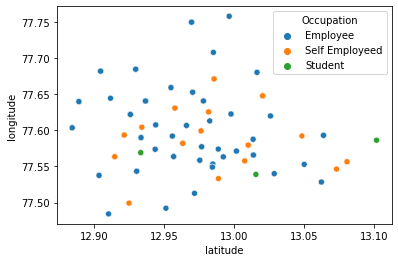

In [35]:
cluster_0_df = df[df['Cluster'] == 0]
sns.scatterplot(x=cluster_0_df['latitude'], y=cluster_0_df['longitude'], hue=cluster_0_df['Occupation']);

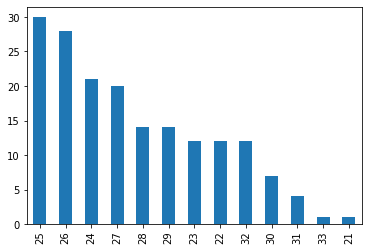

In [36]:
cluster_0_df['Age'].value_counts().plot(kind='bar')

In [37]:
# ['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Family size', 'latitude', 'longitude', 'Medium (P1)', 'Meal(P1)', 'Order Time', 'Output' ]

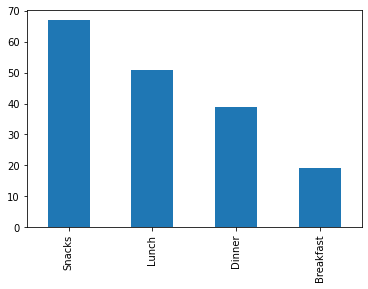

In [38]:
cluster_0_df['Meal(P1)'].value_counts().plot(kind='bar')

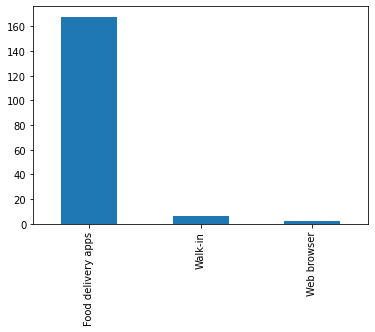

In [39]:
cluster_0_df['Medium (P1)'].value_counts().plot(kind='bar')

In [40]:
from xgboost import XGBClassifier

encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
X_val_encoded = encoder.transform(X_val) # 검증데이터

model = XGBClassifier(
    n_estimators=1000,  
    max_depth=7,   
    learning_rate=0.2,
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
          eval_metric='error', # #(wrong cases)/#(all cases)
          early_stopping_rounds=50
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤

[0]	validation_0-error:0.060484	validation_1-error:0.076923
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.068548	validation_1-error:0.076923
[2]	validation_0-error:0.056452	validation_1-error:0.102564
[3]	validation_0-error:0.052419	validation_1-error:0.102564
[4]	validation_0-error:0.056452	validation_1-error:0.102564
[5]	validation_0-error:0.044355	validation_1-error:0.102564
[6]	validation_0-error:0.044355	validation_1-error:0.089744
[7]	validation_0-error:0.040323	validation_1-error:0.089744
[8]	validation_0-error:0.040323	validation_1-error:0.089744
[9]	validation_0-error:0.040323	validation_1-error:0.089744
[10]	validation_0-error:0.044355	validation_1-error:0.089744
[11]	validation_0-error:0.040323	validation_1-error:0.089744
[12]	validation_0-error:0.040323	validation_1-error:0.089744
[13]	validation_0-error:0.040323	validation_1-error:0.08

XGBClassifier(learning_rate=0.2, max_depth=7, n_estimators=1000, n_jobs=-1)

In [41]:
pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    XGBClassifier(random_state=2
                  , n_jobs=-1,
                  n_estimators=21,  
                 )
)

dists = {
     'xgbclassifier__learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
      'xgbclassifier__max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
      'xgbclassifier__min_child_weight' : [ 1, 3, 5, 7 ],
      'xgbclassifier__gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
      'xgbclassifier__colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ],
}
    
clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=10, 
    cv=5, 
    scoring='roc_auc',  
    verbose=1,
    n_jobs=-1
)

In [42]:
clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [43]:
clf_pipe = clf.best_estimator_

print('검증 정확도', clf_pipe.score(X_val, y_val))
print(classification_report(y_val, clf_pipe.predict(X_val)))

검증 정확도 0.9358974358974359
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        35
           1       0.97      0.91      0.94        43

    accuracy                           0.94        78
   macro avg       0.93      0.94      0.94        78
weighted avg       0.94      0.94      0.94        78



In [44]:
from sklearn.metrics import roc_auc_score

y_pred_proba = clf_pipe.predict_proba(X_val)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))

AUC score:  0.9800664451827243


In [45]:
y_test = clf_pipe.predict(X_test)
print('검증 정확도', clf_pipe.score(X_test, y_test))

검증 정확도 1.0
